In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [31]:
import datetime

In [182]:
df = pd.read_csv('data/Child_data.csv', index_col= 0)

In [183]:
df.head(5)

,name,Birth Month,Birth Year,Day,Height,Remarks
1,David,5,88,1st Monday,2'0'',Boy with Left biggerfoot and Right dominant hand
2,Lars,10,87,3rd Tuesday,2'1'',Boy with Left biggerfoot and Left dominant hand
3,Zach,12,87,2nd Saturday,2'0'',Boy with Right biggerfoot and Right dominant ...
4,Josh,1,88,1st Tuesday,2'1'',Boy with Left biggerfoot and Right dominant hand
5,Lang,2,88,1st Monday,2'1'',Boy with Left biggerfoot and Right dominant hand


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 1 to 39
Data columns (total 6 columns):
name           39 non-null object
Birth Month    39 non-null int64
Birth Year     39 non-null int64
Day            39 non-null object
Height         39 non-null object
Remarks        39 non-null object
dtypes: int64(2), object(4)
memory usage: 2.1+ KB


In [185]:
df['Day'] = df['Day'].apply(lambda x: re.match('\d+',x).group()[0])

In [186]:
df.head()

,name,Birth Month,Birth Year,Day,Height,Remarks
1,David,5,88,1,2'0'',Boy with Left biggerfoot and Right dominant hand
2,Lars,10,87,3,2'1'',Boy with Left biggerfoot and Left dominant hand
3,Zach,12,87,2,2'0'',Boy with Right biggerfoot and Right dominant ...
4,Josh,1,88,1,2'1'',Boy with Left biggerfoot and Right dominant hand
5,Lang,2,88,1,2'1'',Boy with Left biggerfoot and Right dominant hand


In [187]:
df['Birth Year'].unique()

array([88, 87], dtype=int64)

In [188]:
df['Birth Year'] = df['Birth Year'].astype('str')

In [189]:
df['Birth Year'] = df['Birth Year'].apply(lambda x: '19'+x)

In [190]:
df['Remarks'].unique()

array(['Boy  with Left biggerfoot and Right dominant hand',
       'Boy  with Left biggerfoot and Left dominant hand',
       'Boy  with Right biggerfoot and Right dominant hand',
       'Girl  with Left biggerfoot and Right dominant hand',
       'Girl  with Right biggerfoot and Right dominant hand',
       'Boy  with Right biggerfoot and Left dominant hand',
       'Girl  with Right biggerfoot and Left dominant hand',
       'Girl  with Left biggerfoot and Left dominant hand'], dtype=object)

In [191]:
df.head()

,name,Birth Month,Birth Year,Day,Height,Remarks
1,David,5,1988,1,2'0'',Boy with Left biggerfoot and Right dominant hand
2,Lars,10,1987,3,2'1'',Boy with Left biggerfoot and Left dominant hand
3,Zach,12,1987,2,2'0'',Boy with Right biggerfoot and Right dominant ...
4,Josh,1,1988,1,2'1'',Boy with Left biggerfoot and Right dominant hand
5,Lang,2,1988,1,2'1'',Boy with Left biggerfoot and Right dominant hand


In [192]:
df['Birth Month'] = df['Birth Month'].astype('str')

In [193]:
df['date'] = df['Day']+'/'+df['Birth Month']+'/'+df['Birth Year']

In [194]:
df.drop(['Day','Birth Month','Birth Year'], axis = 1, inplace = True)

In [195]:
df.head()

,name,Height,Remarks,date
1,David,2'0'',Boy with Left biggerfoot and Right dominant hand,1/5/1988
2,Lars,2'1'',Boy with Left biggerfoot and Left dominant hand,3/10/1987
3,Zach,2'0'',Boy with Right biggerfoot and Right dominant ...,2/12/1987
4,Josh,2'1'',Boy with Left biggerfoot and Right dominant hand,1/1/1988
5,Lang,2'1'',Boy with Left biggerfoot and Right dominant hand,1/2/1988


In [33]:
datetime.datetime.strptime('23/10/2020', '%d/%m/%Y')

datetime.datetime(2020, 10, 23, 0, 0)

In [34]:
df['date'] = df['date'].apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y'))

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 1 to 39
Data columns (total 4 columns):
name       39 non-null object
Height     39 non-null object
Remarks    39 non-null object
date       39 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 1.5+ KB


In [38]:
df[df['date'] > '1/1/1988']

,name,Height,Remarks,date
1,David,2'0'',Boy with Left biggerfoot and Right dominant hand,1988-05-01
5,Lang,2'1'',Boy with Left biggerfoot and Right dominant hand,1988-02-01
6,Scotty,2'1'',Boy with Right biggerfoot and Right dominant ...,1988-03-01
7,Edward,2'2'',Boy with Left biggerfoot and Right dominant hand,1988-02-01
8,Caitlin,1'11'',Girl with Left biggerfoot and Right dominant ...,1988-06-04
9,Eleanor,1'11'',Girl with Right biggerfoot and Right dominant...,1988-05-02
10,Damon,1'10'',Boy with Right biggerfoot and Left dominant hand,1988-09-02
12,Ray,2'0'',Boy with Left biggerfoot and Right dominant hand,1988-03-03
14,Cam,2'3'',Boy with Left biggerfoot and Right dominant hand,1988-03-03
16,Kate,1'11'',Girl with Right biggerfoot and Right dominant...,1988-04-03


In [196]:
df['date'] = pd.to_datetime(df['date'], format = '%d/%m/%Y') #fecha buena

In [197]:
df['edad'] = datetime.datetime.today()-df['date']

In [198]:
df['edad'] =  df['edad']/365.25

In [199]:
df['edad'] = df['edad'].astype('str')

In [200]:
df['edad'] = df['edad'].apply(lambda x: re.match('\d+',x).group())

In [201]:
df.head()

,name,Height,Remarks,date,edad
1,David,2'0'',Boy with Left biggerfoot and Right dominant hand,1988-05-01,32
2,Lars,2'1'',Boy with Left biggerfoot and Left dominant hand,1987-10-03,33
3,Zach,2'0'',Boy with Right biggerfoot and Right dominant ...,1987-12-02,32
4,Josh,2'1'',Boy with Left biggerfoot and Right dominant hand,1988-01-01,32
5,Lang,2'1'',Boy with Left biggerfoot and Right dominant hand,1988-02-01,32


In [202]:
df['gender'] = np.where('Boy' in df['Remarks'],'F','M')

In [203]:
df['Gender'] = np.where(df['Remarks'].str.contains('Boy',regex = False),'M','F')

In [205]:
df.drop('gender',axis = 1, inplace = True)

In [207]:
df['dom_hand'] = np.where(df['Remarks'].str.contains('Right dominant hand',regex = False),'Right','Left')

In [210]:
df['foot'] = np.where(df['Remarks'].str.contains('Right biggerfoot',regex = False),'Right','Left')

In [212]:
df.drop('Remarks', inplace = True, axis = 1)

In [213]:
df

,name,Height,date,edad,Gender,dom_hand,foot
1,David,2'0'',1988-05-01,32,M,Right,Left
2,Lars,2'1'',1987-10-03,33,M,Left,Left
3,Zach,2'0'',1987-12-02,32,M,Right,Right
4,Josh,2'1'',1988-01-01,32,M,Right,Left
5,Lang,2'1'',1988-02-01,32,M,Right,Left
6,Scotty,2'1'',1988-03-01,32,M,Right,Right
7,Edward,2'2'',1988-02-01,32,M,Right,Left
8,Caitlin,1'11'',1988-06-04,32,F,Right,Left
9,Eleanor,1'11'',1988-05-02,32,F,Right,Right
10,Damon,1'10'',1988-09-02,32,M,Left,Right


In [254]:
df = pd.read_csv('data/vehicles_messy.csv')

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [217]:
df.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37843 entries, 0 to 37842
Data columns (total 83 columns):
barrels08          37843 non-null float64
barrelsA08         37843 non-null float64
charge120          37843 non-null float64
charge240          37843 non-null float64
city08             37843 non-null int64
city08U            37843 non-null float64
cityA08            37843 non-null int64
cityA08U           37843 non-null float64
cityCD             37843 non-null float64
cityE              37843 non-null float64
cityUF             37843 non-null float64
co2                37843 non-null int64
co2A               37843 non-null int64
co2TailpipeAGpm    37843 non-null float64
co2TailpipeGpm     37843 non-null float64
comb08             37843 non-null int64
comb08U            37843 non-null float64
combA08            37843 non-null int64
combA08U           37843 non-null float64
combE              37843 non-null float64
combinedCD         37843 non-null float64
combinedUF         37

In [230]:
arr = np.array([2,3,3,4,5,5,6,3,3,4,4])

In [220]:
arr.mean()

4.0

In [221]:
arr.std()

1.0

In [227]:
arr2 = np.array([3,3,4,5,5,6,3,3,4,4,50,60])

In [223]:
arr2.mean()

12.5

In [225]:
arr2.std()

19.13765920900464

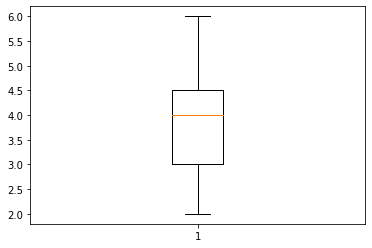

In [231]:
plt.boxplot(arr)
plt.show();

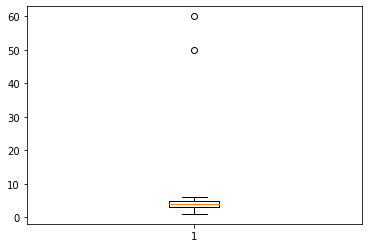

In [232]:
plt.boxplot(arr2)
plt.show();

In [234]:
q25 = pd.Series(arr).quantile(.25)

In [235]:
q75 = pd.Series(arr).quantile(.75)

In [236]:
iqr = q75-q25

In [237]:
q25

3.0

In [239]:
arr3 = np.array([3,4,56,58,63,57,50,65,55,50,60])

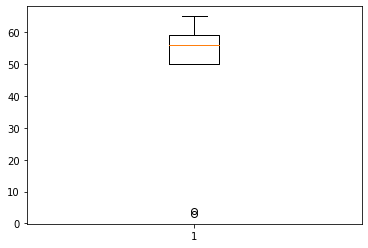

In [240]:
plt.boxplot(arr3)
plt.show();

In [241]:
q25 = pd.Series(arr3).quantile(.25)

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37843 entries, 0 to 37842
Data columns (total 83 columns):
barrels08          37843 non-null float64
barrelsA08         37843 non-null float64
charge120          37843 non-null float64
charge240          37843 non-null float64
city08             37843 non-null int64
city08U            37843 non-null float64
cityA08            37843 non-null int64
cityA08U           37843 non-null float64
cityCD             37843 non-null float64
cityE              37843 non-null float64
cityUF             37843 non-null float64
co2                37843 non-null int64
co2A               37843 non-null int64
co2TailpipeAGpm    37843 non-null float64
co2TailpipeGpm     37843 non-null float64
comb08             37843 non-null int64
comb08U            37843 non-null float64
combA08            37843 non-null int64
combA08U           37843 non-null float64
combE              37843 non-null float64
combinedCD         37843 non-null float64
combinedUF         37

In [255]:
df2 = df[['co2','make','model','trany','mpgData','year','fuelType','cylinders']]

In [249]:
df2['co2'].unique()

array([ -1,   0,  84,  87, 471, 349, 429, 446, 305, 393, 412, 320, 472,
       477, 430, 373, 460, 418, 360, 423, 442, 421, 391, 307, 302, 623,
       596, 463, 425, 367, 406, 413, 433, 459, 470, 383, 401, 437, 473,
       389, 288, 279, 278, 277, 287, 361, 364, 478, 462, 450, 482, 372,
       402, 386, 436, 316, 358, 317, 468, 432, 443, 283, 339, 323, 325,
       428, 297, 370, 415, 548, 444, 309, 639, 534, 497, 244, 517, 646,
       633, 488, 285, 276, 354, 457, 494, 448, 374, 407, 384, 405, 409,
       399, 404, 414, 397, 417, 424, 490, 557, 645, 479, 434, 480, 280,
       304, 447, 493, 394, 532, 521, 501, 568, 618, 533, 567, 576, 526,
       601, 625, 525, 529, 621, 675, 382, 523, 388, 357, 385, 387, 570,
       720, 581, 133, 441, 474, 453, 487, 308, 419, 326, 747, 710, 723,
       615, 731, 169, 395, 476, 464, 270, 271, 267, 345, 295, 431, 291,
       293, 268, 296, 333, 426, 392, 343, 439, 259, 531, 398, 286, 318,
       310, 344, 331, 362, 375, 410, 337, 322, 312, 292, 341, 35

In [250]:
df2['fuelType'].unique()

array(['Regular', 'Premium', 'Diesel', 'CNG', 'Gasoline or natural gas',
       'Gasoline or E85', 'Electricity', 'Gasoline or propane',
       'Premium or E85', 'Midgrade', 'Premium Gas or Electricity',
       'Regular Gas and Electricity', 'Premium and Electricity',
       'Regular Gas or Electricity'], dtype=object)

In [256]:
df2['Elect'] = ['Electric' if 'Electricity' in x else 'other' for x in df2['fuelType']]

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [261]:
df2['Elect'].unique()

array(['other', 'Electric'], dtype=object)

In [265]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37843 entries, 0 to 37842
Data columns (total 9 columns):
co2          37843 non-null int64
make         37843 non-null object
model        37843 non-null object
trany        37832 non-null object
mpgData      37843 non-null object
year         37843 non-null int64
fuelType     37843 non-null object
cylinders    37720 non-null float64
Elect        37843 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 2.6+ MB


In [266]:
df2['trany'] = df2['trany'].astype('str')

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [271]:
df2['vel'] = df2['trany'].apply(lambda x: re.findall('\d+',x))

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [273]:
df2['trany'] = df2['trany'].apply(lambda x: re.sub('\d+.+','',x))

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [277]:
df2['model'] = df2['model'].apply(lambda x: re.sub('\d+.+','',x))

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [278]:
df2.head()

,co2,make,model,trany,mpgData,year,fuelType,cylinders,Elect,vel
0,-1,Alfa Romeo,Spider Veloce,Manual,Y,1985,Regular,4.0,other,[5]
1,-1,Ferrari,Testarossa,Manual,N,1985,Regular,12.0,other,[5]
2,-1,Dodge,Charger,Manual,Y,1985,Regular,4.0,other,[5]
3,-1,Dodge,B,Automatic,N,1985,Regular,8.0,other,[3]
4,-1,Subaru,Legacy AWD Turbo,Manual,N,1993,Premium,4.0,other,[5]
